# Online store of sporting goods

Content

On the main page of the store they show users banners in order to stimulate their sales. Now one of 5 banners is randomly displayed there. Each banner advertises a specific product or the entire company. Our marketers believe that the experience with banners can vary by segment, and their effectiveness may depend on the characteristics of user behavior.

Inspiration

Help the manager make a decision.

In [1]:
! pip install kaggle  #  upload dataset from kaggle by kaggle api

! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/

! chmod 600 ~/.kaggle/kaggle.json

! kaggle datasets download podsyp/how-to-do-product-analytics

! unzip how-to-do-product-analytics.zip

 97% 448M/462M [00:03<00:00, 111MB/s]
100% 462M/462M [00:03<00:00, 132MB/s]
Archive:  how-to-do-product-analytics.zip
  inflating: product.csv             


In [34]:
import pandas as pd  #  import library
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')



In [ ]:
df_pd = pd.read_csv('product.csv')

In [4]:
df_pd.head(10)

,order_id,user_id,page_id,product,site_version,time,title,target
0,cfcd208495d565ef66e7dff9f98764da,c81e728d9d4c2f636f067f89cc14862c,6f4922f45568161a8cdf4ad2299f6d23,sneakers,desktop,2019-01-11 09:24:43,banner_click,0
1,c4ca4238a0b923820dcc509a6f75849b,eccbc87e4b5ce2fe28308fd9f2a7baf3,4e732ced3463d06de0ca9a15b6153677,sneakers,desktop,2019-01-09 09:38:51,banner_show,0
2,c81e728d9d4c2f636f067f89cc14862c,eccbc87e4b5ce2fe28308fd9f2a7baf3,5c45a86277b8bf17bff6011be5cfb1b9,sports_nutrition,desktop,2019-01-09 09:12:45,banner_show,0
3,eccbc87e4b5ce2fe28308fd9f2a7baf3,eccbc87e4b5ce2fe28308fd9f2a7baf3,fb339ad311d50a229e497085aad219c7,company,desktop,2019-01-03 08:58:18,banner_show,0
4,a87ff679a2f3e71d9181a67b7542122c,eccbc87e4b5ce2fe28308fd9f2a7baf3,fb339ad311d50a229e497085aad219c7,company,desktop,2019-01-03 08:59:15,banner_click,0
5,e4da3b7fbbce2345d7772b0674a318d5,a87ff679a2f3e71d9181a67b7542122c,182be0c5cdcd5072bb1864cdee4d3d6e,sports_nutrition,mobile,2019-01-14 05:33:39,banner_show,0
6,1679091c5a880faf6fb5e6087eb1b2dc,e4da3b7fbbce2345d7772b0674a318d5,e369853df766fa44e1ed0ff613f563bd,sneakers,mobile,2019-03-02 15:10:16,banner_show,0
7,8f14e45fceea167a5a36dedd4bea2543,1679091c5a880faf6fb5e6087eb1b2dc,1c383cd30b7c298ab50293adfecb7b18,sneakers,desktop,2019-02-10 12:19:30,banner_show,0
8,c9f0f895fb98ab9159f51fd0297e236d,8f14e45fceea167a5a36dedd4bea2543,17e62166fc8586dfa4d1bc0e1742c08b,accessories,desktop,2019-02-06 05:21:08,banner_show,0
9,45c48cce2e2d7fbdea1afc51c7c6ad26,8f14e45fceea167a5a36dedd4bea2543,2ff279ece91cd2eaae06e449f5a20a0c,clothes,desktop,2019-01-24 10:36:13,banner_show,0


In [5]:
df_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8471220 entries, 0 to 8471219
Data columns (total 8 columns):
 #   Column        Dtype 
---  ------        ----- 
 0   order_id      object
 1   user_id       object
 2   page_id       object
 3   product       object
 4   site_version  object
 5   time          object
 6   title         object
 7   target        int64 
dtypes: int64(1), object(7)
memory usage: 517.0+ MB


In [6]:
df_pd.isna().sum()

order_id        0
user_id         0
page_id         0
product         0
site_version    0
time            0
title           0
target          0
dtype: int64

In [7]:
{i : df_pd[i].nunique() for i in df_pd.columns}  #  observe attribute of data

{'order_id': 8471220,
 'page_id': 7393316,
 'product': 5,
 'site_version': 2,
 'target': 2,
 'time': 5799549,
 'title': 3,
 'user_id': 4254619}

In [8]:
df_pd.title.unique()  #  data are distinct in page_id show & duplicate by title method

array(['banner_click', 'banner_show', 'order'], dtype=object)

In [9]:
df_show = df_pd[df_pd.title == 'banner_show']  # split data to each title
df_show

,order_id,user_id,page_id,product,site_version,time,title,target
1,c4ca4238a0b923820dcc509a6f75849b,eccbc87e4b5ce2fe28308fd9f2a7baf3,4e732ced3463d06de0ca9a15b6153677,sneakers,desktop,2019-01-09 09:38:51,banner_show,0
2,c81e728d9d4c2f636f067f89cc14862c,eccbc87e4b5ce2fe28308fd9f2a7baf3,5c45a86277b8bf17bff6011be5cfb1b9,sports_nutrition,desktop,2019-01-09 09:12:45,banner_show,0
3,eccbc87e4b5ce2fe28308fd9f2a7baf3,eccbc87e4b5ce2fe28308fd9f2a7baf3,fb339ad311d50a229e497085aad219c7,company,desktop,2019-01-03 08:58:18,banner_show,0
5,e4da3b7fbbce2345d7772b0674a318d5,a87ff679a2f3e71d9181a67b7542122c,182be0c5cdcd5072bb1864cdee4d3d6e,sports_nutrition,mobile,2019-01-14 05:33:39,banner_show,0
6,1679091c5a880faf6fb5e6087eb1b2dc,e4da3b7fbbce2345d7772b0674a318d5,e369853df766fa44e1ed0ff613f563bd,sneakers,mobile,2019-03-02 15:10:16,banner_show,0
...,...,...,...,...,...,...,...,...
8471215,70c275428b8d53eef294d0529253b694,59e736f90b5f8003072bf0eb271ddb86,7bc3a33568d00773d5b58d6c7348bf3e,accessories,desktop,2019-05-23 14:07:00,banner_show,0
8471216,94c9a2a0c11c2b88e49c13e401608c86,69d73bfcaaa83217c903627e602ae01c,f236830bcbb2d279c0c7c3d7f5d3a970,clothes,mobile,2019-05-28 08:10:20,banner_show,0
8471217,862568e6013bc378b06f43c3e466521a,61728d26a9c9feb9e128c17b400062c8,4fc14437e418f19200e71acf4f34b3ba,sports_nutrition,mobile,2019-05-20 09:20:50,banner_show,0
8471218,7c70b42806372ba85f47a3956f23a114,f90e8c3bcf3867e65d62a2a08189a35a,c6a3e7758b9c0a43417c4a2c1a4504dd,sneakers,mobile,2019-05-28 19:25:42,banner_show,0


In [10]:
len(df_show)  #  Amount of all banner shown to user

7393314

In [11]:
df_show['time'] = pd.to_datetime(df_show['time'])  # set datetime to time columns
df_show.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7393314 entries, 1 to 8471219
Data columns (total 8 columns):
 #   Column        Dtype         
---  ------        -----         
 0   order_id      object        
 1   user_id       object        
 2   page_id       object        
 3   product       object        
 4   site_version  object        
 5   time          datetime64[ns]
 6   title         object        
 7   target        int64         
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 507.7+ MB


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [12]:
df_show['days'] = df_show['time'].dt.to_period("d")  #  extract date of data

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [13]:
df_show.days.nunique()  #  days observation

151

In [14]:
df_show.days.min()  #  start day observation

Period('2019-01-01', 'D')

In [15]:
df_show.days.max()  #  end day observation

Period('2019-05-31', 'D')

In [16]:
banner_show_days = len(df_show) / 151  #  average banner show per days
banner_show_days

48962.34437086093

In [17]:
df_click = df_pd[df_pd.title == 'banner_click']  #  split by click method
df_click

,order_id,user_id,page_id,product,site_version,time,title,target
0,cfcd208495d565ef66e7dff9f98764da,c81e728d9d4c2f636f067f89cc14862c,6f4922f45568161a8cdf4ad2299f6d23,sneakers,desktop,2019-01-11 09:24:43,banner_click,0
4,a87ff679a2f3e71d9181a67b7542122c,eccbc87e4b5ce2fe28308fd9f2a7baf3,fb339ad311d50a229e497085aad219c7,company,desktop,2019-01-03 08:59:15,banner_click,0
30,34173cb38f07f89ddbebc2ac9128303f,45c48cce2e2d7fbdea1afc51c7c6ad26,67c6a1e7ce56d3d6fa748ab6d9af3fd7,sports_nutrition,mobile,2019-02-04 03:18:45,banner_click,0
31,c16a5320fa475530d9583c34fd356ef5,45c48cce2e2d7fbdea1afc51c7c6ad26,6c38fc1f2e3a4ae55b58a6c10cfda2ee,sneakers,mobile,2019-01-21 21:00:42,banner_click,0
32,6364d3f0f495b6ab9dcf8d3b5c6e0b01,45c48cce2e2d7fbdea1afc51c7c6ad26,2294a7913d5696d1793f852faa4b0f51,sports_nutrition,mobile,2019-03-20 19:37:24,banner_click,0
...,...,...,...,...,...,...,...,...
8471172,0ba33d5ca5ff41d122d7b5a476883e3d,3d8ffc8abe80a8d2260aea6ab27f44df,66a3a81472c816e4d4ce345207ec0c29,company,mobile,2019-05-20 19:02:48,banner_click,0
8471183,78ce19b90566f0a1d6c888c61945721d,16d61c8453b64f7e69f56efe992b782a,7ef7b4cd26152e2f9ee17350983232dd,clothes,mobile,2019-05-25 19:27:05,banner_click,0
8471187,6209f3f8c301622ec7fd3374ea73f5f2,74d1486d5f87ac1a0d2e916b2fea9282,32b18075827f7b0cf3e522ccb9c250ce,clothes,mobile,2019-05-25 04:29:01,banner_click,0
8471197,90e4e2454f09da77d887572fa2e3276f,1944f7ee00bf0957536286e1b3ba0298,00d7a3c222170c404903e9d6b05efc78,accessories,mobile,2019-05-29 08:33:55,banner_click,0


In [18]:
df_order = df_pd[df_pd.title == 'order']  #  split by order
len(df_order)

248722

Little EDA of data

In [19]:
product_click = df_click.groupby('product')['page_id'].count()
product_click

product
accessories         136254
clothes             220595
company             144821
sneakers            182596
sports_nutrition    144918
Name: page_id, dtype: int64

In [20]:
product_show = df_show.groupby('product')['page_id'].count()
product_show

product
accessories         1440954
clothes             1453128
company             1580235
sneakers            1453027
sports_nutrition    1465970
Name: page_id, dtype: int64

In [21]:
product_click_perc = product_click / product_show * 100    #  rank of click rate of product banner
product_click_perc.sort_values(ascending = False)

product
clothes             15.180700
sneakers            12.566594
sports_nutrition     9.885468
accessories          9.455819
company              9.164523
Name: page_id, dtype: float64

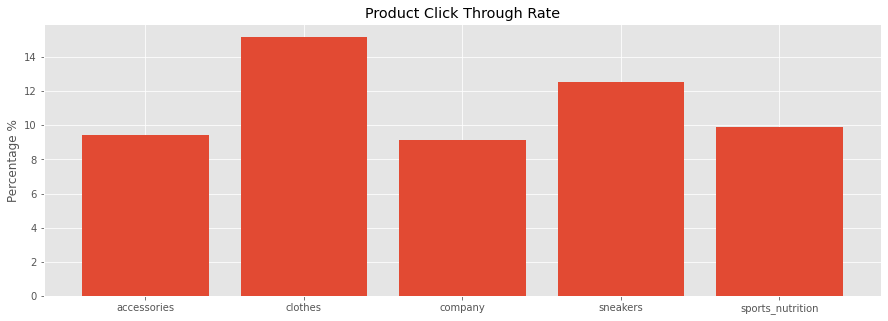

In [62]:
plt.figure(figsize = (15,5))
plt.bar(x = product_click_perc.index, height = product_click_perc.values)
plt.ylabel('Percentage %')
plt.title('Product Click Through Rate')
plt.show()

In [70]:
show_click = df_show.merge(df_click, how = 'left', on = 'page_id',suffixes=('', '_click'))  #  merge data to specific the label for click and don't get click banner
show_click

,order_id,user_id,page_id,product,site_version,time,title,target,days,order_id_click,user_id_click,product_click,site_version_click,time_click,title_click,target_click
0,c4ca4238a0b923820dcc509a6f75849b,eccbc87e4b5ce2fe28308fd9f2a7baf3,4e732ced3463d06de0ca9a15b6153677,sneakers,desktop,2019-01-09 09:38:51,banner_show,0,2019-01-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,c81e728d9d4c2f636f067f89cc14862c,eccbc87e4b5ce2fe28308fd9f2a7baf3,5c45a86277b8bf17bff6011be5cfb1b9,sports_nutrition,desktop,2019-01-09 09:12:45,banner_show,0,2019-01-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,eccbc87e4b5ce2fe28308fd9f2a7baf3,eccbc87e4b5ce2fe28308fd9f2a7baf3,fb339ad311d50a229e497085aad219c7,company,desktop,2019-01-03 08:58:18,banner_show,0,2019-01-03,a87ff679a2f3e71d9181a67b7542122c,eccbc87e4b5ce2fe28308fd9f2a7baf3,company,desktop,2019-01-03 08:59:15,banner_click,0.0
3,e4da3b7fbbce2345d7772b0674a318d5,a87ff679a2f3e71d9181a67b7542122c,182be0c5cdcd5072bb1864cdee4d3d6e,sports_nutrition,mobile,2019-01-14 05:33:39,banner_show,0,2019-01-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1679091c5a880faf6fb5e6087eb1b2dc,e4da3b7fbbce2345d7772b0674a318d5,e369853df766fa44e1ed0ff613f563bd,sneakers,mobile,2019-03-02 15:10:16,banner_show,0,2019-03-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7393309,70c275428b8d53eef294d0529253b694,59e736f90b5f8003072bf0eb271ddb86,7bc3a33568d00773d5b58d6c7348bf3e,accessories,desktop,2019-05-23 14:07:00,banner_show,0,2019-05-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7393310,94c9a2a0c11c2b88e49c13e401608c86,69d73bfcaaa83217c903627e602ae01c,f236830bcbb2d279c0c7c3d7f5d3a970,clothes,mobile,2019-05-28 08:10:20,banner_show,0,2019-05-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7393311,862568e6013bc378b06f43c3e466521a,61728d26a9c9feb9e128c17b400062c8,4fc14437e418f19200e71acf4f34b3ba,sports_nutrition,mobile,2019-05-20 09:20:50,banner_show,0,2019-05-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7393312,7c70b42806372ba85f47a3956f23a114,f90e8c3bcf3867e65d62a2a08189a35a,c6a3e7758b9c0a43417c4a2c1a4504dd,sneakers,mobile,2019-05-28 19:25:42,banner_show,0,2019-05-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [71]:
show_click = show_click[['page_id', 'time', 'title', 'title_click' ]]  # selecting intresting feature & mapping label 1 for click and 0 for don't
show_click = show_click.fillna(0)
show_click['title_click'] = show_click['title_click'].replace('banner_click',1)
show_click = show_click.drop('title', axis = 1)
show_click

,page_id,time,title_click
0,4e732ced3463d06de0ca9a15b6153677,2019-01-09 09:38:51,0
1,5c45a86277b8bf17bff6011be5cfb1b9,2019-01-09 09:12:45,0
2,fb339ad311d50a229e497085aad219c7,2019-01-03 08:58:18,1
3,182be0c5cdcd5072bb1864cdee4d3d6e,2019-01-14 05:33:39,0
4,e369853df766fa44e1ed0ff613f563bd,2019-03-02 15:10:16,0
...,...,...,...
7393309,7bc3a33568d00773d5b58d6c7348bf3e,2019-05-23 14:07:00,0
7393310,f236830bcbb2d279c0c7c3d7f5d3a970,2019-05-28 08:10:20,0
7393311,4fc14437e418f19200e71acf4f34b3ba,2019-05-20 09:20:50,0
7393312,c6a3e7758b9c0a43417c4a2c1a4504dd,2019-05-28 19:25:42,0


In [72]:
show_click['time'] = pd.to_datetime(show_click['time'])  # extract days
show_click['days'] = show_click['time'].dt.to_period('d')
show_click['Hours'] = show_click['time'].apply(lambda x: x.hour)
show_click = show_click.drop('time', axis = 1)
show_click

,page_id,title_click,days,Hours
0,4e732ced3463d06de0ca9a15b6153677,0,2019-01-09,9
1,5c45a86277b8bf17bff6011be5cfb1b9,0,2019-01-09,9
2,fb339ad311d50a229e497085aad219c7,1,2019-01-03,8
3,182be0c5cdcd5072bb1864cdee4d3d6e,0,2019-01-14,5
4,e369853df766fa44e1ed0ff613f563bd,0,2019-03-02,15
...,...,...,...,...
7393309,7bc3a33568d00773d5b58d6c7348bf3e,0,2019-05-23,14
7393310,f236830bcbb2d279c0c7c3d7f5d3a970,0,2019-05-28,8
7393311,4fc14437e418f19200e71acf4f34b3ba,0,2019-05-20,9
7393312,c6a3e7758b9c0a43417c4a2c1a4504dd,0,2019-05-28,19


In [86]:
hours_click = show_click.groupby('Hours')['title_click'].value_counts().unstack()

In [88]:
hours_click['Click rate'] = hours_click[1] / hours_click[0]

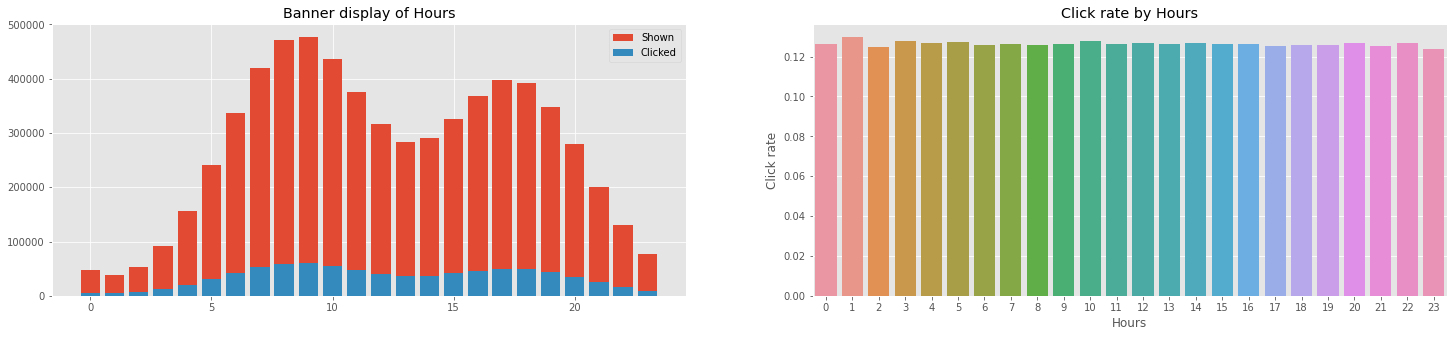

In [121]:
plt.figure(figsize = (25,5))

ax1 = plt.subplot(1,2,1)
ax1 = plt.bar(x = hours_click.index, height = hours_click[0], label = 'Shown')
ax1 = plt.bar(x = hours_click.index, height = hours_click[1], label = 'Clicked')
ax1 = plt.title('Banner display of Hours')
ax1 = plt.legend()
ax2 = plt.subplot(1,2,2)
ax2 = sns.barplot(data = hours_click, x = hours_click.index, y = 'Click rate') 
ax2 = plt.title('Click rate by Hours')
plt.show()

In [25]:
count_days = show_click.groupby('days')['title_click'].count()  #  count banner show per days
count_days

days
2019-01-01    28993
2019-01-02    31338
2019-01-03    33576
2019-01-04    35702
2019-01-05    37623
              ...  
2019-05-27    47090
2019-05-28    43719
2019-05-29    41196
2019-05-30    37585
2019-05-31    35024
Freq: D, Name: title_click, Length: 151, dtype: int64

In [26]:
click_per_day = show_click.groupby('days')['title_click'].sum()  #  count banner click per days
click_per_day

days
2019-01-01    3360
2019-01-02    3541
2019-01-03    3813
2019-01-04    4060
2019-01-05    4264
              ... 
2019-05-27    5325
2019-05-28    5030
2019-05-29    4606
2019-05-30    4279
2019-05-31    3993
Freq: D, Name: title_click, Length: 151, dtype: int64

In [27]:
conversion_rate_per_day = click_per_day / count_days  * 100 # click throught rate per days
conversion_rate_per_day

days
2019-01-01    11.589004
2019-01-02    11.299381
2019-01-03    11.356326
2019-01-04    11.371912
2019-01-05    11.333493
                ...    
2019-05-27    11.308133
2019-05-28    11.505295
2019-05-29    11.180697
2019-05-30    11.384861
2019-05-31    11.400754
Freq: D, Name: title_click, Length: 151, dtype: float64

In [28]:
all_conversion = conversion_rate_per_day.values.tolist()

Text(0.5, 1.0, 'Click throught rate per day distribution')

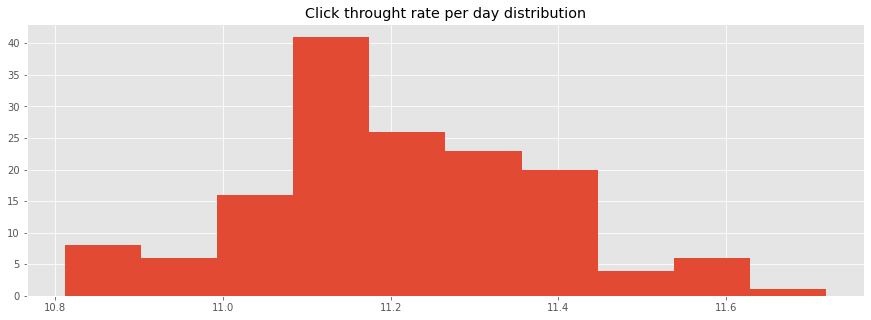

In [30]:
plt.figure(figsize = (15,5))
plt.hist(all_conversion)
plt.title('Click throught rate per day distribution')

Suppose we have to improve the conversion rate efficient by 2%

In [57]:
mean = np.mean(show_click['title_click'].values)  #  mean of click throught rate
print('Mean of all Conversion Rate from obsevation: {:.4f}'.format(mean))

Mean of all Conversion Rate from obsevation: 0.1122


In [58]:
std = np.std(show_click['title_click'].values)  #  std of click throught rate
print('STD of all Conversion Rate : {:.4f}'.format(std))

STD of all Conversion Rate : 0.3156


In [61]:
improve_CR = (np.mean(show_click['title_click'].values)) + (np.mean(show_click['title_click'].values) * 0.02)  # the result of click throught rate per days improve by 2%
print('Target Conversion Rate : {:.4f}'.format(improve_CR))

Target Conversion Rate : 0.1144


# Conclusion

Calculator for AB test sample size
[link text](https://clincalc.com/stats/samplesize.aspx)

By Calculator above with 95% confident

and statistic power 80%

the approximation of sample size for perform A/B test is 646094

by traffic around 50k banner shown per days

This experiment will take around 13 days to summarize the hyphothesis testing in change of conversion rate by banner set changing with using the given mathematical approach.